In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
import MetaTrader5 as mt5
from account_credentials import LOGIN,PASSWORD,SERVER
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [83]:
is_initialized = mt5.initialize()
print('initialize: ', is_initialized)

is_logged_in = mt5.login(LOGIN, PASSWORD, SERVER)
print('logged in: ', is_logged_in)
print('\n')
account_info = mt5.account_info()
print(datetime.now(),
    '| Login: ', account_info.login,
    '| Balance: ', account_info.balance,
    '| Equity: ' , account_info.equity)

initialize:  True
logged in:  True


2023-04-27 07:09:22.537930 | Login:  114123121 | Balance:  484.96 | Equity:  484.96


In [84]:
symbol = 'XAUUSD'
number_of_date= 10000
timeframe = mt5.TIMEFRAME_H1
from_date = datetime.now()

df = pd.DataFrame(mt5.copy_rates_from(symbol,timeframe,from_date,number_of_date))
df["time"] = pd.to_datetime(df["time"], unit="s")
df = df.rename(columns={'time': 'date','tick_volume':'volume'})
df = df[['date','open','high','low','close','volume']]
df = df.set_index("date")
print(df.head()) # just to make sure that sorted from old to new

                         open      high       low     close  volume
date                                                               
2021-08-17 08:00:00  1792.923  1794.813  1790.981  1794.586    2915
2021-08-17 09:00:00  1794.572  1794.997  1792.627  1793.914    2655
2021-08-17 10:00:00  1793.946  1795.324  1793.566  1794.933    2182
2021-08-17 11:00:00  1794.887  1795.576  1791.303  1791.329    2942
2021-08-17 12:00:00  1791.283  1794.606  1787.918  1789.462    7351


##### Adding Features

In [85]:
df['RSI'] = ta.rsi(df.close, length = 15)
df['EMAF'] = ta.ema(df.close, length = 20)
df['EMAM'] = ta.ema(df.close, length = 100)
df['EMAS'] = ta.ema(df.close, length = 150)
# df['Target'] = df['close'] - df.open
# df['Target'] = df['Target'].shift(-1)

# df['TargetClass'] = [1 if df.Target[i] > 0 else 0 for i in range(len(df))]
df['Target-Next-Close'] = df['close'].shift(-1)



df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop(['date','volume'], axis=1 , inplace=True)
# df = df[0:100]
df

,open,high,low,close,RSI,EMAF,EMAM,EMAS,Target-Next-Close
0,1792.265,1792.410,1790.336,1790.836,42.630183,1793.257942,1793.551812,1790.406280,1790.511
1,1790.791,1791.005,1789.832,1790.511,42.088970,1792.996328,1793.491597,1790.407667,1790.903
2,1791.019,1791.251,1790.472,1790.903,43.023753,1792.796963,1793.440338,1790.414228,1791.577
3,1790.914,1791.577,1790.842,1791.577,44.669088,1792.680776,1793.403440,1790.429629,1790.193
4,1791.574,1791.924,1790.013,1790.193,42.000657,1792.443845,1793.339867,1790.426495,1790.317
...,...,...,...,...,...,...,...,...,...
9845,1988.322,1990.971,1984.534,1990.314,45.111986,1994.476642,1993.355765,1994.671213,1988.017
9846,1990.348,1991.616,1987.037,1988.017,42.685367,1993.861438,1993.250047,1994.583077,1989.167
9847,1987.985,1989.715,1987.215,1989.167,44.292757,1993.414348,1993.169195,1994.511341,1990.107
9848,1989.801,1990.770,1989.154,1990.107,45.628192,1993.099363,1993.108557,1994.453006,1991.685


In [86]:
df

,open,high,low,close,RSI,EMAF,EMAM,EMAS,Target-Next-Close
0,1792.265,1792.410,1790.336,1790.836,42.630183,1793.257942,1793.551812,1790.406280,1790.511
1,1790.791,1791.005,1789.832,1790.511,42.088970,1792.996328,1793.491597,1790.407667,1790.903
2,1791.019,1791.251,1790.472,1790.903,43.023753,1792.796963,1793.440338,1790.414228,1791.577
3,1790.914,1791.577,1790.842,1791.577,44.669088,1792.680776,1793.403440,1790.429629,1790.193
4,1791.574,1791.924,1790.013,1790.193,42.000657,1792.443845,1793.339867,1790.426495,1790.317
...,...,...,...,...,...,...,...,...,...
9845,1988.322,1990.971,1984.534,1990.314,45.111986,1994.476642,1993.355765,1994.671213,1988.017
9846,1990.348,1991.616,1987.037,1988.017,42.685367,1993.861438,1993.250047,1994.583077,1989.167
9847,1987.985,1989.715,1987.215,1989.167,44.292757,1993.414348,1993.169195,1994.511341,1990.107
9848,1989.801,1990.770,1989.154,1990.107,45.628192,1993.099363,1993.108557,1994.453006,1991.685


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_x = StandardScaler().fit(df.iloc[:,:8])
scaled_x = scaler_x.transform(df.iloc[:,:8])
scaler_y = StandardScaler().fit(df.iloc[:,8].values.reshape(-1, 1))
scaled_y = scaler_y.transform(df.iloc[:,8].values.reshape(-1, 1))
scaled_x.shape

In [ ]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaled_x = scaler_x.fit_transform(df.iloc[:,:8])
print(scaled_x.shape)
# scaled_x

In [ ]:
scaler_y = MinMaxScaler(feature_range=(0,1))
scaled_y = scaler_y.fit_transform(df.iloc[:,8].values.reshape(-1, 1))
print(scaled_y.shape)
#scaled_y

In [ ]:
X = []
backcandles = 30
print(scaled_x.shape[0])
for j in range(8): 
    X.append([])
    for i in range(0, scaled_x.shape[0]-backcandles+1):
        X[j].append(scaled_x[i:i+backcandles, j])
print(np.array(X).shape)

X = np.moveaxis(X, [0], [2])  # move the feature axis to the second dimension
print(X.shape)

# # Save the array to a CSV file
# np.savetxt('arrayx.csv', scaled_x, delimiter=',')
# np.savetxt('arrayy.csv', scaled_y, delimiter=',')

In [ ]:
X[0,0,:]

In [ ]:
X[0,:,0]

In [ ]:
# X = X
y = scaled_y[(scaled_y.shape[0]-X.shape[0]):,:] # matching the shape of X
# y = np.reshape(y,(len(y),1))
print(X.shape) # 3D X has 8 colume and each colume contain xx backcandles (row, backcandle, column)
print(y.shape) # 2D contain 1 value (it's 1D array that reshape into 2D array)

In [ ]:
proportion = int(len(X)*0.8)
X_train, X_test = X[:proportion],X[proportion:]
y_train, y_test = y[:proportion],y[proportion:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [ ]:
X[proportion,-1,:] # row สุดท้ายของ X_test

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the Sequential model
model = Sequential()

# Add the LSTM layer with 150 units and input shape (backcandles, 8)
model.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

# Add a dense layer with a single output neuron and linear activation function
model.add(Dense(units=1, activation='linear', name='output'))

# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Train the model on the training data with a batch size of 15 and for 30 epochs
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))


In [60]:
best_model = None
best_loss = float('inf')

for i in range(20):
    # Define the Sequential model
    model_loop = Sequential()

    # Add the LSTM layer with 150 units and input shape (backcandles, 8)
    model_loop.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

    # Add a dense layer with a single output neuron and linear activation function
    model_loop.add(Dense(units=1, activation='linear', name='output'))

    # Compile the model with the Adam optimizer and mean squared error loss function
    model_loop.compile(optimizer='adam', loss='mse')

    # Train the model on the training data with a batch size of 15 and for 30 epochs
    model_loop.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

    # Evaluate the model on the validation data
    val_loss = model_loop.evaluate(x=X_test, y=y_test)

    # If this is the best model so far, store it
    if val_loss < best_loss:
        model = model_loop
        best_loss = val_loss

print(f'The best model has a validation loss of {best_loss}.')


Epoch 1/30
524/524 [==============================] - 5s 8ms/step - loss: 0.0019 - val_loss: 1.6352e-04
Epoch 2/30
524/524 [==============================] - 4s 7ms/step - loss: 1.2899e-04 - val_loss: 1.1390e-04
Epoch 3/30
524/524 [==============================] - 4s 7ms/step - loss: 1.1464e-04 - val_loss: 1.0462e-04
Epoch 4/30
524/524 [==============================] - 4s 7ms/step - loss: 1.0799e-04 - val_loss: 1.0305e-04
Epoch 5/30
524/524 [==============================] - 4s 7ms/step - loss: 1.0911e-04 - val_loss: 9.3623e-05
Epoch 6/30
524/524 [==============================] - 4s 7ms/step - loss: 1.0191e-04 - val_loss: 1.0740e-04
Epoch 7/30
524/524 [==============================] - 4s 7ms/step - loss: 9.6698e-05 - val_loss: 2.2107e-04
Epoch 8/30
524/524 [==============================] - 4s 7ms/step - loss: 9.1178e-05 - val_loss: 1.0200e-04
Epoch 9/30
524/524 [==============================] - 4s 7ms/step - loss: 1.0424e-04 - val_loss: 8.8483e-05
Epoch 10/30
524/524 [===========

In [61]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer (LSTM)           (None, 150)               95400     
                                                                 
 output (Dense)              (None, 1)                 151       
                                                                 
Total params: 95,551
Trainable params: 95,551
Non-trainable params: 0
_________________________________________________________________


In [62]:
y_hat = model.predict(X_test)
for i in range(10):
    print(y_hat[i], y_test[i])

62/62 [==============================] - 0s 4ms/step
[0.3929425] [0.39465199]
[0.39385676] [0.39967624]
[0.3990948] [0.39920363]
[0.39727592] [0.40196862]
[0.40088373] [0.40191783]
[0.4003168] [0.39993242]
[0.39926323] [0.39855876]
[0.39782733] [0.39212772]
[0.3929012] [0.39173682]
[0.39017454] [0.40609624]


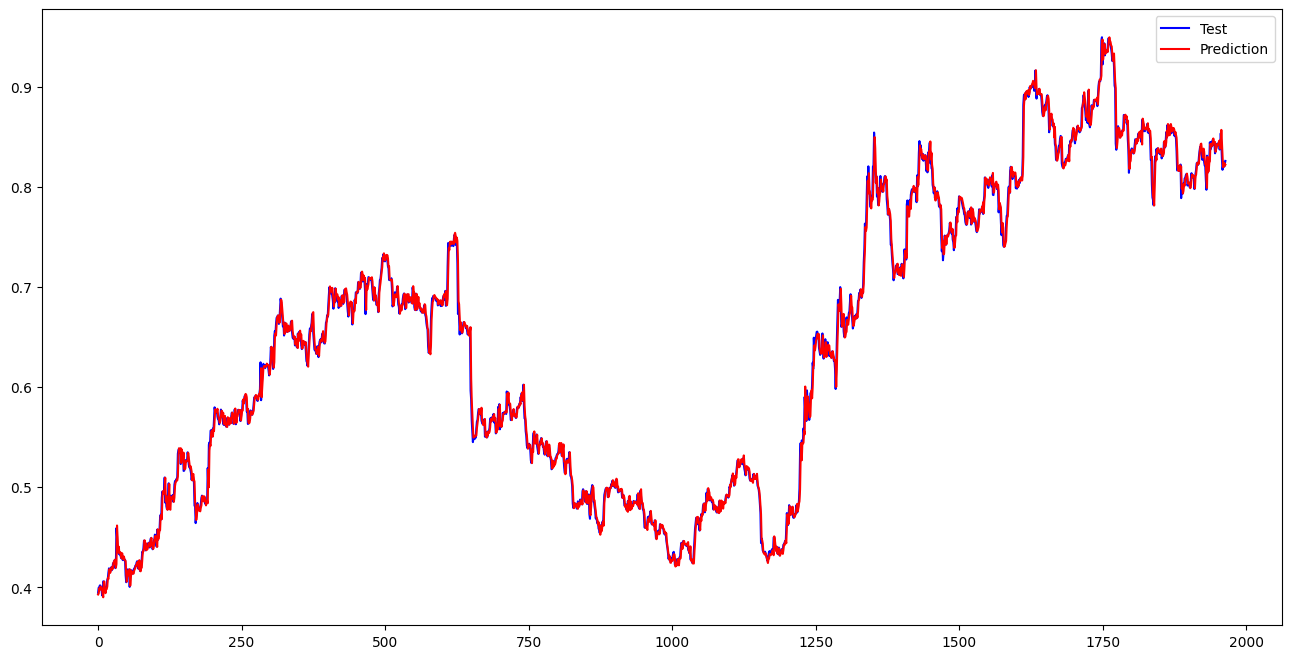

In [63]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_hat, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [64]:
y_hat_inverse = scaler_y.inverse_transform(y_hat)
print("y predict",y_hat_inverse)

print()

y_test_inverse = scaler_y.inverse_transform(y_test)
print("y actual",y_test_inverse)

y predict [[1794.6089]
 [1795.023 ]
 [1797.3947]
 ...
 [1989.7838]
 [1988.375 ]
 [1988.914 ]]

y actual [[1795.383]
 [1797.658]
 [1797.444]
 ...
 [1988.017]
 [1989.167]
 [1990.626]]


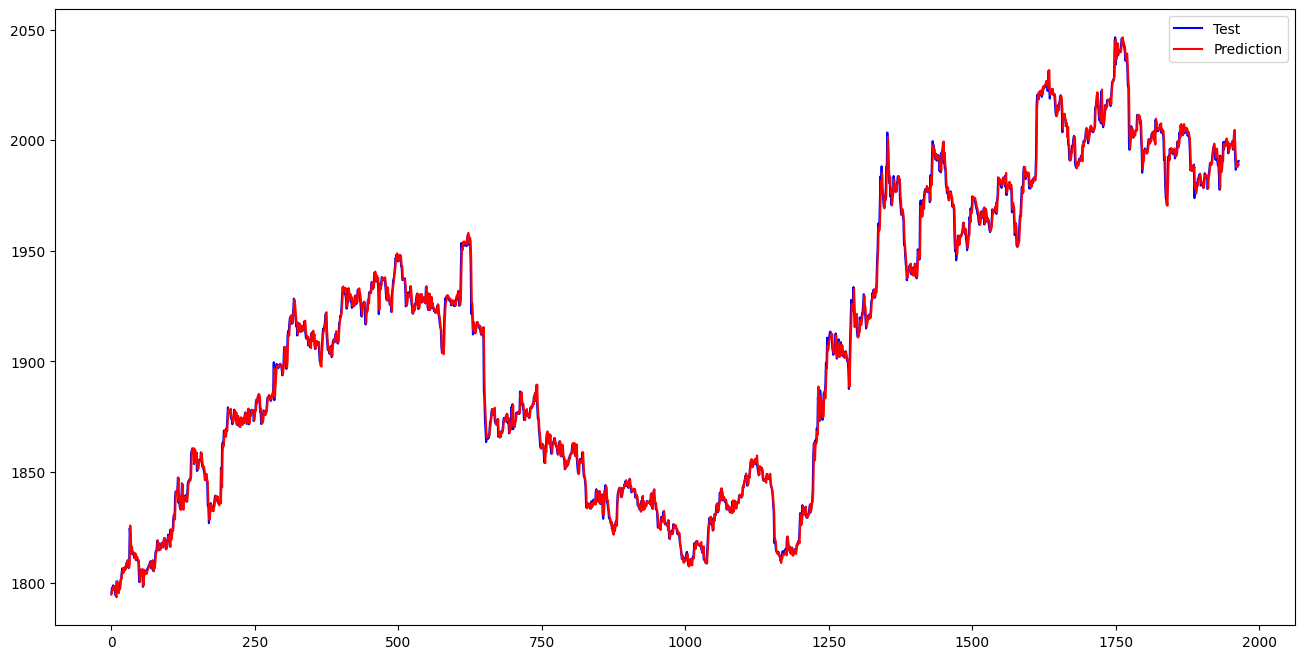

In [65]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inverse, color = 'blue', label = 'Test')
plt.plot(y_hat_inverse, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [77]:
print(y_hat_inverse)
print(y_test_inverse)

[[1794.6089]
 [1795.023 ]
 [1797.3947]
 ...
 [1989.7838]
 [1988.375 ]
 [1988.914 ]]
[[1795.383]
 [1797.658]
 [1797.444]
 ...
 [1988.017]
 [1989.167]
 [1990.626]]


In [66]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)

# Print the mean squared error loss
print('Test loss:', loss)

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Compute the coefficient of determination (R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("TEST SET")
print('Mean squared error (MAE)(loss):', mae)
print('Mean squared error (MSE)(loss):', mse)
print('Root mean squared error (RMSE):', rmse)
print('R-squared (R2):', r2)
print()

loss = model.evaluate(X_train, y_train)
print('Training loss:', loss)

y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_train, y_pred)
print("TRAINING SET")
print('Mean squared error (MAE)(loss):', mae)
print('Mean squared error (MSE):', mse)
print('Root mean squared error (RMSE):', rmse)
print('R-squared (R2):', r2) # one is good 0 is bad, the value range from 0 to 1

62/62 [==============================] - 0s 4ms/step - loss: 7.0973e-05
Test loss: 7.097272464307025e-05
62/62 [==============================] - 0s 4ms/step
TEST SET
Mean squared error (MAE)(loss): 0.0056424694960276744
Mean squared error (MSE)(loss): 7.09726988365791e-05
Root mean squared error (RMSE): 0.008424529591412157
R-squared (R2): 0.9967852700961215

246/246 [==============================] - 1s 4ms/step - loss: 5.8317e-05
Training loss: 5.8316916693001986e-05
246/246 [==============================] - 1s 4ms/step
TRAINING SET
Mean squared error (MAE)(loss): 0.005049053176332279
Mean squared error (MSE): 5.8316925982662105e-05
Root mean squared error (RMSE): 0.007636551969486104
R-squared (R2): 0.9981796458226188


In [67]:
#อันนี้ถ้าได้ค่าเป็นบวก ก็แค่บอกเป็นความในว่า ใน data ที่ใช้ test นี้ ส่วนไหญ่แล้วมี Tredn ราคาหลักไปทางนั้งมากกว่า เช่น ถ้าเป็น positve แปลว่าส่วนมาก ราคาขึ้น negative ก็แปลว่าส่วนมากราคาลง
diff = []
for i in range(0,len(y_hat_inverse)):
    val = float(y_hat_inverse[i] - y_test_inverse[i])
    diff.append(val)
pred_diff = sum(diff)/len(diff)
print(f"pred_diff {pred_diff}")



#อาจจะเป็น predict long or short ก็ได้ regardless of neg or pos, see below
# Predict < ClosePrice(from predict) > actual ---> Short ---> P - a = Positive Value
# Predict < ClosePrice(from predict) < actual ---> Short ---> P - a = Negative Value
# Predict > ClosePrice(from predict) > actual ---> Long ---> P - a = Positive Value
# Predict > ClosePrice(from predict) < actual ---> Long ---> P - a = Negative Value
# ด้วยเหตุผลนี้ ใช้ เป็น abs น่าจะ make sense มากกว่าในการทำ simulation
diff_pos = []
diff_neg = []
v_zero = []
for i in range(0,len(y_hat_inverse)):
    val = float(y_hat_inverse[i] - y_test_inverse[i])
    if val > 0:
        diff_pos.append(val)
    elif val < 0:
        diff_neg.append(val)
    elif val ==0:
        v_zero.append(val)
    else:
        raise ValueError("All conditions were not met")
pred_diff_pos = sum(diff_pos)/len(diff_pos)
pred_diff_neg = sum(diff_neg)/len(diff_neg)
print(f"pred_diff_pos {pred_diff_pos}")
print(f"pred_diff_neg {pred_diff_neg}")
print(f"v_zero {v_zero}")

#ใช้อันนี้น่าจะ make sense สุดเพราะ เราไม่สามารถรู้ได้ว่ามันจะ เป็น Negative Diff หรือว่า Positive Diff, regardless what's the type of trading order is.
diff = []
for i in range(0,len(y_hat_inverse)):
    val = abs(float(y_hat_inverse[i] - y_test_inverse[i]))
    diff.append(val)
pred_diff_abs = sum(diff)/len(diff)
print(f"pred_diff_abs {pred_diff_abs}")

pred_diff 0.025949820590806555
pred_diff_pos 2.5717207060962815
pred_diff_neg -2.538023716802861
v_zero []
pred_diff_abs 2.5549322315322796


#### Simulation

In [75]:
#Function to get prediction_raw (Didn't adjust with diff yet)
def get_pred(X_test_data,row):
    # Get a single input row
    input_row = X_test_data[row, :, :]  
    # print(f"shape {input_row.shape}")

    # Reshape the input row
    input_row = np.reshape(input_row, (1, input_row.shape[0], input_row.shape[1]))  
    # print(f"shape for prediction {input_row.shape}")

    # Make a prediction using the reshaped input row
    prediction_raw = model.predict(input_row)  
    prediction_raw = float(scaler_y.inverse_transform(prediction_raw)) 
    return prediction_raw


def get_act(y_test_data,row):
    actual_y = float(scaler_y.inverse_transform(y_test_data[row,:].reshape(-1,1)))
    return actual_y

def get_close(three_d_features_data_set,row):
    features = scaler_x.inverse_transform(three_d_features_data_set[row,-1,:].reshape(1, -1))
    close = float(features[0,3]) # close_price is at location 3 in dataframe
    return close


In [89]:
actual_y = float(scaler_y.inverse_transform(y_test[0,:].reshape(-1,1)))


In [102]:
max(scaler_y.inverse_transform(y_test[0:5,:]))

array([1798.696])

In [92]:
y_test[0,:].shape

(1,)

In [98]:
scaler_y.inverse_transform(y_test[0:5,:])

array([[1795.383],
       [1797.658],
       [1797.444],
       [1798.696],
       [1798.673]])

In [97]:
scaler_y.inverse_transform(y_test)

array([[1795.383],
       [1797.658],
       [1797.444],
       ...,
       [1988.017],
       [1989.167],
       [1990.626]])

In [69]:
prediction_raw = get_pred(X_test,0)
actual_y = get_act(y_test,0)
close = get_close(X_test,0)
print(f"prediction raw {prediction_raw}")
print(f"actual_y {actual_y}")
print(f"close {close}")

1/1 [==============================] - 0s 13ms/step
prediction raw 1794.60888671875
actual_y 1795.383
close 1794.788


In [124]:
diff

0

In [121]:
#เนื่องจากพอสร้าง ออเด้อแล้วใช้ sl tp เท่ากัน ยังไงก็เสียมากกว่าเนื่องจาก spread
# if win >>> gain x
# if lost >>> loss x + spread

# diff = pred_diff_abs
diff = 0
tp_sl_range = 3.1
spread = 200
spread = spread*0.0001

sim_result = pd.DataFrame({'order_type':[],'close':[], 'prediction_raw':[], 'prediction':[], 'target_price':[], 'actual_y':[],'trade_result':[]})
sim_data = []

# for loop
for row in range(0,len(y_test)):
    close = get_close(X_test,row)
    prediction_raw = get_pred(X_test,row)
    actual_y = get_act(y_test,row)

    if prediction_raw == 0:
        print("Do nothing")

    # LONG
    elif prediction_raw > close:
        # define order type
        order_type = "L"
        # must be after prediction >= close
        target_price = close + tp_sl_range + spread # เพิ่ม spread เพิ่มเมื่อ win จะได้เอา spread คืน
        # must be after prediction >= close, because we don't know whether to plus or minus prediction with pred_diff
        prediction = prediction_raw - diff
        if prediction <= target_price:
            print("Do nothing")
            trade_result = "Nothing"
        elif prediction > target_price and actual_y > target_price:
            print("trade L win")
            trade_result = "Win"
        elif prediction > target_price and actual_y < target_price:
            print("Trade L loss")
            trade_result = "Loss"
        else:
            print("error")
            print(prediction)


    # SHORT
    elif prediction_raw < close:
        # define order type
        order_type = "S"
        # must be after prediction >= close
        target_price = close - tp_sl_range - spread # เพิ่ม spread เพิ่มเมื่อ win จะได้เอา spread คืน
        # must be after prediction >= close, because we don't know whether to plus or minus prediction with pred_diff
        prediction = prediction_raw + diff
        if prediction >= target_price:
            print("Do nothing")
            trade_result = "Nothing"
        elif prediction < target_price and actual_y < target_price:
            print("trade L win")
            trade_result = "Win"
        elif prediction < target_price and actual_y > target_price:
            print("Trade L loss")
            trade_result = "Loss"
        else:
            print("error")
            print(prediction)

    else:
        raise ValueError("Error condition not met")
    
    sim_data.append({'order_type':order_type,'close':close, 'prediction_raw':prediction_raw, 'prediction':prediction, 'target_price':target_price, 'actual_y':actual_y,'trade_result':trade_result})

sim_result = pd.concat([sim_result, pd.DataFrame(sim_data)])

    # print(f"order type {order_type}")
    # print(f"close {close}")
    # print(f"prediction_raw {prediction_raw}")
    # print(f"prediction {prediction}")
    # print(f"target_price_l {target_price}")
    # print(f"actual_y {actual_y}")
    


1/1 [==============================] - 0s 17ms/step
Do nothing
1/1 [==============================] - 0s 18ms/step
Do nothing
1/1 [==============================] - 0s 16ms/step
Do nothing
1/1 [==============================] - 0s 18ms/step
Do nothing
1/1 [==============================] - 0s 17ms/step
Do nothing
1/1 [==============================] - 0s 16ms/step
Do nothing
1/1 [==============================] - 0s 14ms/step
Do nothing
1/1 [==============================] - 0s 15ms/step
Do nothing
1/1 [==============================] - 0s 15ms/step
Do nothing
1/1 [==============================] - 0s 15ms/step
Do nothing
1/1 [==============================] - 0s 15ms/step
Do nothing
1/1 [==============================] - 0s 16ms/step
Do nothing
1/1 [==============================] - 0s 16ms/step
Do nothing
1/1 [==============================] - 0s 15ms/step
Do nothing
1/1 [==============================] - 0s 16ms/step
Do nothing
1/1 [==============================] - 0s 17ms/step
Do 

In [127]:
Nothing = (sim_result["trade_result"] == "Nothing").sum()
Win = (sim_result["trade_result"] == "Win").sum()
Lost = (sim_result["trade_result"] == "Loss").sum()
print(f"Nothing {Nothing}")
print(f"Win {Win}")
print(f"Lost {Lost}")
mean_close = (sim_result["close"]).mean()
mean_raw = (sim_result["prediction_raw"]).mean()
mean_actual_y = (sim_result["actual_y"]).mean()
print("mean_close",mean_close)
print("mean_raw",mean_raw)
print("mean_actual_y",mean_actual_y)
op_l = ((sim_result["close"] - sim_result["actual_y"]) >= 3.1).sum()
print("Opportunities L",op_l)
op_s = ((sim_result["close"] - sim_result["actual_y"]) <= 3.1).sum()
print("Opportunities S",op_s)



Nothing 1957
Win 3
Lost 5
mean_close 1907.8148870229008
mean_raw 1907.940498829616
mean_actual_y 1907.9145501272264
Opportunities L 249
Opportunities S 1716


In [118]:
sim_result.to_csv("sim_result.csv")